<a href="https://colab.research.google.com/github/wildson-lab/Estudos-IA/blob/main/Grafo_A_(Praia_do_Forte)_Tempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Praia do Forte - Algoritmo A* (A Estrela)

Este problema é baseado no mapa das cidades da Romênia, um problema típico de algoritmos de busca. O objetivo do problema é determinar o melhor caminho entre duas cidades, sendo comum o uso de algoritmos heurísticos de busca para sua resolução.

Esta versão do problema consiste em encontrar o melhor caminho entre Salvador e a Praia do Forte, através de algoritmos de busca heurística. Os dados deste problema foram obtidos do Google Maps, e são dados reais.

Baseado no mapa real, foi elaborado o mapa simplificado a seguir, mostrando as distâncias reais entre as localidades percorrendo as rodovias existentes.

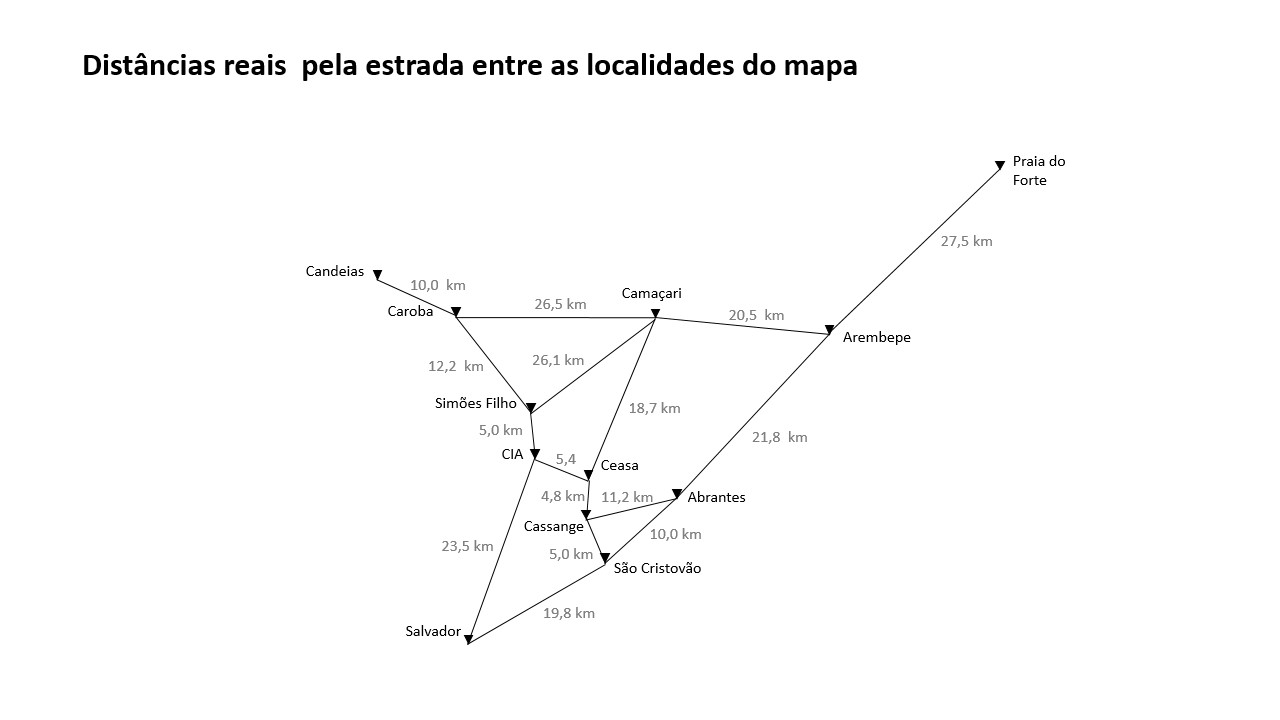



Note que, partindo de Salvador, é possível chegar à Praia do Forte por diversos caminhos, como por exemplo:
- Salvador/ São Cristovão/ Abrantes/ Arembepe / Praia do Forte
- Salvador/ CIA/ Ceasa/ Camaçari/ Arembepe/ Praia do Forte
- Salvador/ CIA/ Simões Filho/ Caroba/ Camaçari/ Arembepe/ Praia do Forte...

De forma semelhante ao problema do mapa da Romênia, a heurística utilizada será a distância em linha reta de cada localidade até a Praia do Forte, conforme mostrado na imagem a seguir.

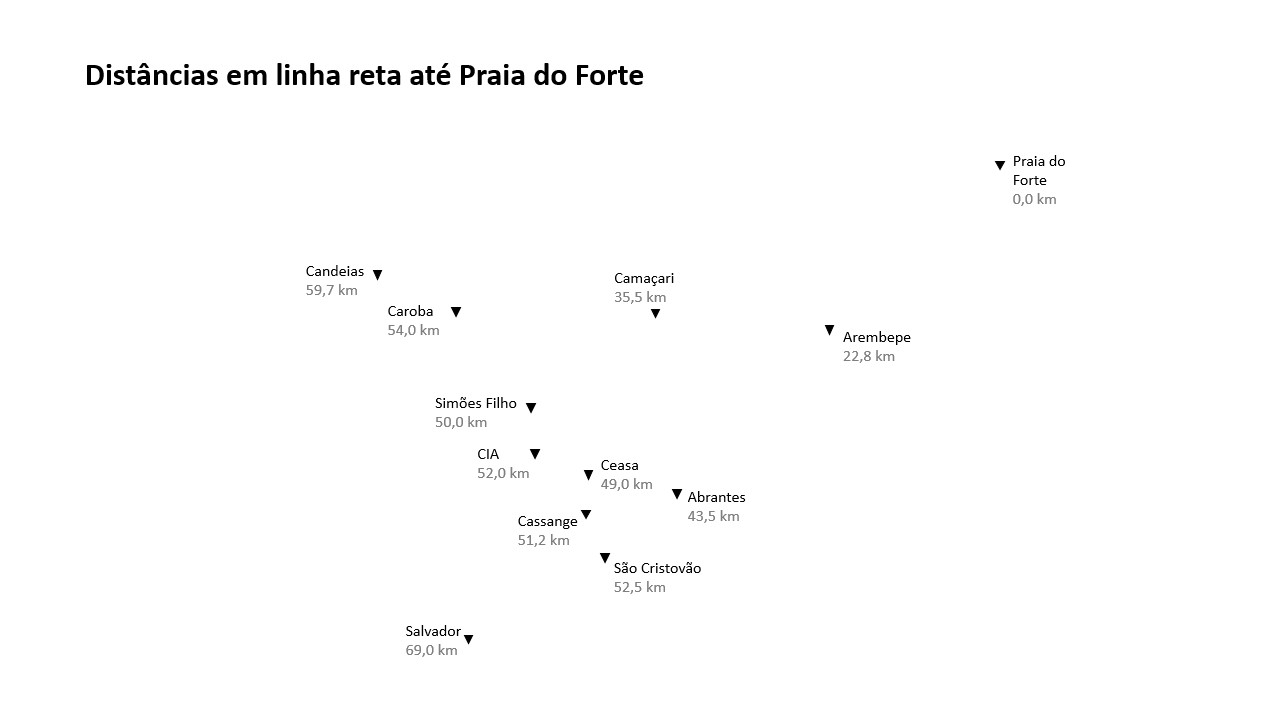

Inicialmente

In [25]:
class Vertice:
  def __init__(self, rotulo, distancia_objetivo):
    self.rotulo = rotulo
    self.visitado = False
    self.distancia_objetivo = distancia_objetivo
    self.adjacentes = []

  def adiciona_adjacente(self, adjacente):
    self.adjacentes.append(adjacente)

  def mostra_adjacentes(self):
    for i in self.adjacentes:
      print(i.vertice.rotulo)

In [26]:
class Adjacente:
  def __init__(self, vertice, custo, velocidade):
   self.vertice = vertice
   self.custo = custo
   self.velocidade = velocidade
   self.tempo = 60 * self.custo / self.velocidade
   self.distancia_aestrela = vertice.distancia_objetivo + self.custo
   self.custo_aestrela_tempo = vertice.distancia_objetivo + self.tempo

In [27]:
class Grafo:
  salvador = Vertice('Salvador', 69.0)
  cia = Vertice('CIA', 52.0)
  simoes_filho = Vertice('Simões Filho', 50.0)
  caroba = Vertice('Caroba', 54.0)
  candeias = Vertice('Candeias', 59.7)
  ceasa = Vertice('Ceasa', 49.0)
  cassange = Vertice('Cassange', 51.2)
  sao_cristovao = Vertice('São Cristovao', 52.5)
  abrantes = Vertice('Abrantes', 43.5)
  arembepe = Vertice('Arembepe', 22.8)
  camacari = Vertice('Camaçari', 35.5)
  praia_do_forte = Vertice('Praia do Forte', 0.0)

  # Adicionando as ligações entre as cidades adjacentes

  salvador.adiciona_adjacente(Adjacente(cia, 23.5, 90))
  salvador.adiciona_adjacente(Adjacente(sao_cristovao, 19.8, 80))

  cia.adiciona_adjacente(Adjacente(salvador, 23.5, 90))
  cia.adiciona_adjacente(Adjacente(ceasa, 5.4, 80))
  cia.adiciona_adjacente(Adjacente(simoes_filho, 5.0, 100))

  simoes_filho.adiciona_adjacente(Adjacente(cia, 5.0, 100))
  simoes_filho.adiciona_adjacente(Adjacente(camacari, 26.1, 80))
  simoes_filho.adiciona_adjacente(Adjacente(caroba, 12.2, 100))

  caroba.adiciona_adjacente(Adjacente(camacari, 26.5, 80))
  caroba.adiciona_adjacente(Adjacente(simoes_filho, 12.2, 100))
  caroba.adiciona_adjacente(Adjacente(candeias, 10.0, 60))

  candeias.adiciona_adjacente(Adjacente(caroba, 10.0, 60))

  ceasa.adiciona_adjacente(Adjacente(camacari, 18.7, 80))
  ceasa.adiciona_adjacente(Adjacente(cassange, 4.8, 80))
  ceasa.adiciona_adjacente(Adjacente(cia, 5.4, 80))

  cassange.adiciona_adjacente(Adjacente(ceasa, 4.8, 80))
  cassange.adiciona_adjacente(Adjacente(sao_cristovao, 5.0, 80))
  cassange.adiciona_adjacente(Adjacente(abrantes, 11.2, 80))

  sao_cristovao.adiciona_adjacente(Adjacente(cassange, 5.0, 80))
  sao_cristovao.adiciona_adjacente(Adjacente(abrantes, 10.0, 60))
  sao_cristovao.adiciona_adjacente(Adjacente(salvador, 19.8, 80))

  abrantes.adiciona_adjacente(Adjacente(arembepe, 21.8, 70))
  abrantes.adiciona_adjacente(Adjacente(cassange, 11.2, 80))
  abrantes.adiciona_adjacente(Adjacente(sao_cristovao, 10.0, 60))

  arembepe.adiciona_adjacente(Adjacente(camacari, 20.5, 80))
  arembepe.adiciona_adjacente(Adjacente(abrantes, 21.8, 70))
  arembepe.adiciona_adjacente(Adjacente(praia_do_forte, 27.5, 80))

  camacari.adiciona_adjacente(Adjacente(arembepe, 20.5, 80))
  camacari.adiciona_adjacente(Adjacente(ceasa, 18.7, 80))
  camacari.adiciona_adjacente(Adjacente(simoes_filho, 26.1, 80))
  camacari.adiciona_adjacente(Adjacente(caroba, 26.5, 80))

  praia_do_forte.adiciona_adjacente(Adjacente(arembepe, 27.5, 80))


In [28]:
grafo = Grafo()

In [29]:
import numpy as np

class VetorOrdenado:
  def __init__(self, capacidade):
    self.capacidade = capacidade
    self.ultima_posicao = -1
    self.valores = np.empty(self.capacidade, dtype=object)

  def insere(self, vertice):
    if self.ultima_posicao == self.capacidade - 1:
      print('Capacidade maxima atingida')
      return
    posicao = 0

    for i in range(self.ultima_posicao + 1):
      posicao = i
      if self.valores[i].custo_aestrela_tempo > vertice.custo_aestrela_tempo:
        break
      if i == self.ultima_posicao:
        posicao = i + 1

    x = self.ultima_posicao
    while x >= posicao:
      self.valores[x + 1] = self.valores[x]
      x -= 1
    self.valores[posicao] = vertice
    self.ultima_posicao += 1

  def imprime(self):
    if self.ultima_posicao == -1:
      print('O vetor está vazio.')
    else:
      for i in range(self.ultima_posicao + 1):
        print(i, ' - ',
              self.valores[i].vertice.rotulo, ' - ',
              self.valores[i].custo, ' - ',
              self.valores[i].vertice.distancia_objetivo, ' - ',
              self.valores[i].distancia_aestrela, ' - ',
              self.valores[i].custo_aestrela_tempo, ' - ',
              self.valores[i].tempo)

In [30]:
vetor = VetorOrdenado(3)
vetor.insere(grafo.cia.adjacentes[0])
vetor.insere(grafo.cia.adjacentes[1])
vetor.insere(grafo.cia.adjacentes[2])
vetor.imprime()

0  -  Simões Filho  -  5.0  -  50.0  -  55.0  -  53.0  -  3.0
1  -  Ceasa  -  5.4  -  49.0  -  54.4  -  53.05  -  4.05
2  -  Salvador  -  23.5  -  69.0  -  92.5  -  84.66666666666667  -  15.666666666666666


# Algoritmo A* (A Estrela)

In [31]:
#@title Busca A*


class AEstrela:

  def __init__(self, objetivo):
    self.objetivo = objetivo
    self.encontrado = False
    self.km_percorrido = 0.0
    self.tempo_total = 0


  def buscar(self, atual):
    print('-----')
    print('Atual: {}'.format(atual.rotulo))
    atual.visitado = True


    if atual == self.objetivo:
      self.encontrado = True
    else:
      vetor_ordenado = VetorOrdenado(len(atual.adjacentes))
      distancia_trecho = 9999
      tempo_trecho = 0
      for adjacente in atual.adjacentes:
        if adjacente.vertice.visitado == False:
          adjacente.vertice.visitado = True
          vetor_ordenado.insere(adjacente)

      vetor_ordenado.imprime()

      distancia_trecho = vetor_ordenado.valores[0].custo
      tempo_trecho = vetor_ordenado.valores[0].tempo
      print('Próximo Destino: {}'.format(vetor_ordenado.valores[0].vertice.rotulo))
      print('Tempo até o próximo destino: {} minutos'.format(tempo_trecho))

      if len(vetor_ordenado.valores) > 1:
        for i in range(1, len(vetor_ordenado.valores)-1):
          vetor_ordenado.valores[i].vertice.visitado = False

      if vetor_ordenado.valores[0] != None:
        self.buscar(vetor_ordenado.valores[0].vertice)
        self.km_percorrido += distancia_trecho
        self.tempo_total += tempo_trecho

  def mostra_distancia(self):
    print('Distância percorrida: {} km'.format(self.km_percorrido))

  def mostra_tempo(self):
    print('Tempo total: {} minutos'.format(self.tempo_total))


In [32]:
busca_aestrela = AEstrela(grafo.praia_do_forte)
busca_aestrela.buscar(grafo.salvador)
busca_aestrela.mostra_distancia()
busca_aestrela.mostra_tempo()

-----
Atual: Salvador
0  -  São Cristovao  -  19.8  -  52.5  -  72.3  -  67.35  -  14.85
1  -  CIA  -  23.5  -  52.0  -  75.5  -  67.66666666666667  -  15.666666666666666
Próximo Destino: São Cristovao
Tempo até o próximo destino: 14.85 minutos
-----
Atual: São Cristovao
0  -  Abrantes  -  10.0  -  43.5  -  53.5  -  53.5  -  10.0
1  -  Cassange  -  5.0  -  51.2  -  56.2  -  54.95  -  3.75
Próximo Destino: Abrantes
Tempo até o próximo destino: 10.0 minutos
-----
Atual: Abrantes
0  -  Arembepe  -  21.8  -  22.8  -  44.6  -  41.48571428571429  -  18.685714285714287
1  -  Cassange  -  11.2  -  51.2  -  62.400000000000006  -  59.6  -  8.4
Próximo Destino: Arembepe
Tempo até o próximo destino: 18.685714285714287 minutos
-----
Atual: Arembepe
0  -  Praia do Forte  -  27.5  -  0.0  -  27.5  -  20.625  -  20.625
1  -  Camaçari  -  20.5  -  35.5  -  56.0  -  50.875  -  15.375
Próximo Destino: Praia do Forte
Tempo até o próximo destino: 20.625 minutos
-----
Atual: Praia do Forte
Distância percorr